In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ImportWarning

ImportWarning

In [2]:
df1 = pd.read_csv("transaction_data.csv")

In [3]:
df2=pd.read_csv("purchase_behaviour.csv")

In [4]:
df = df1.merge(df2, on="LYLTY_CARD_NBR", how="outer")

In [5]:
# Display merged dataset
df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream
5,43462,1,1005,6,86,Cheetos Puffs 165g,1,2.8,MIDAGE SINGLES/COUPLES,Mainstream
6,43438,1,1007,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,YOUNG SINGLES/COUPLES,Budget
7,43439,1,1007,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,YOUNG SINGLES/COUPLES,Budget
8,43424,1,1009,9,20,Doritos Cheese Supreme 330g,1,5.7,NEW FAMILIES,Premium
9,43352,1,1010,10,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Mainstream


## Exploratory data analysis (EDA)

In [6]:
# Checking  for missing values
print(df.isnull().sum())

# Checking for duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
Duplicate Rows: 1


In [7]:
# Summary of numerical columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include=['object']))

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

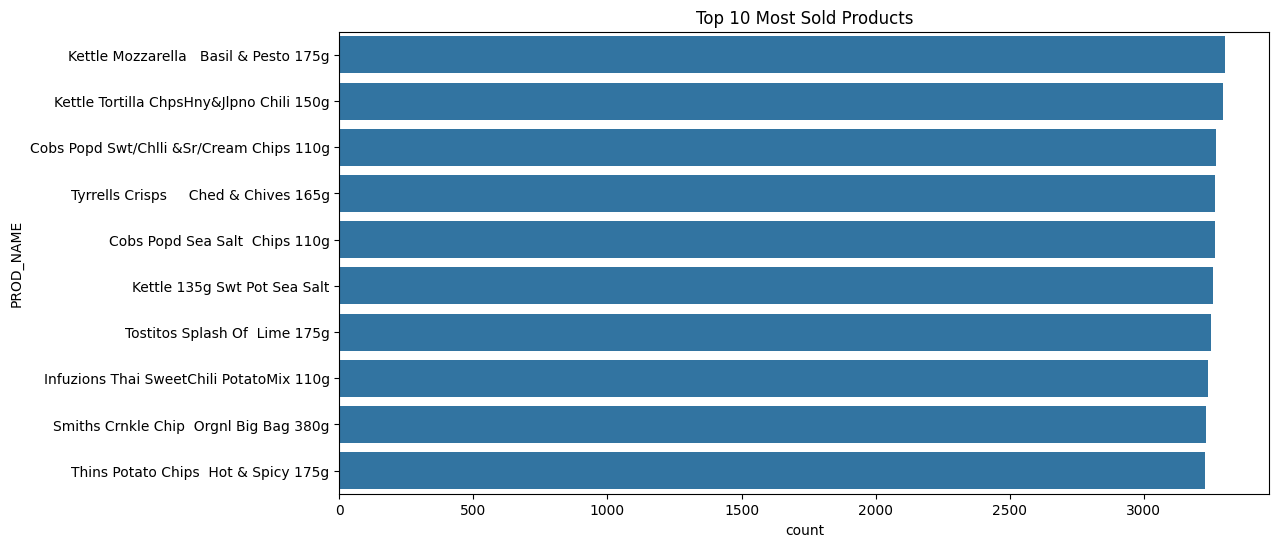

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most Frequent Products
plt.figure(figsize=(12, 6))
sns.countplot(y=df["PROD_NAME"], order=df["PROD_NAME"].value_counts().index[:10])
plt.title("Top 10 Most Sold Products")
plt.show()

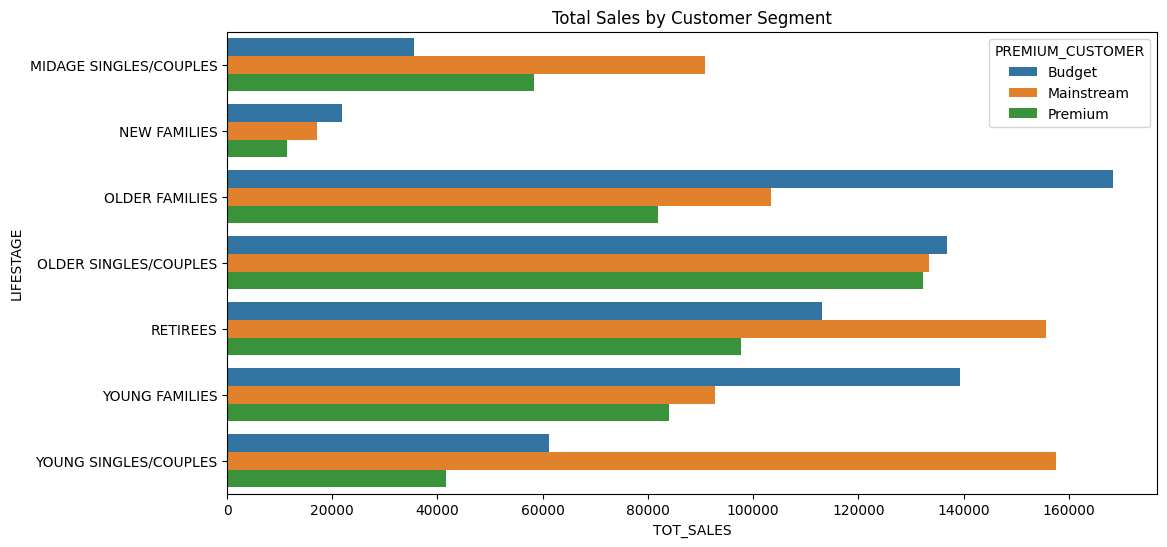

In [9]:
# Grouping by Lifestage and Premium Status
customer_segments = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="TOT_SALES", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=customer_segments)
plt.title("Total Sales by Customer Segment")
plt.show()

C:\Users\shaz9\AppData\Local\Temp\ipykernel_17620\2693682403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products, palette="viridis")


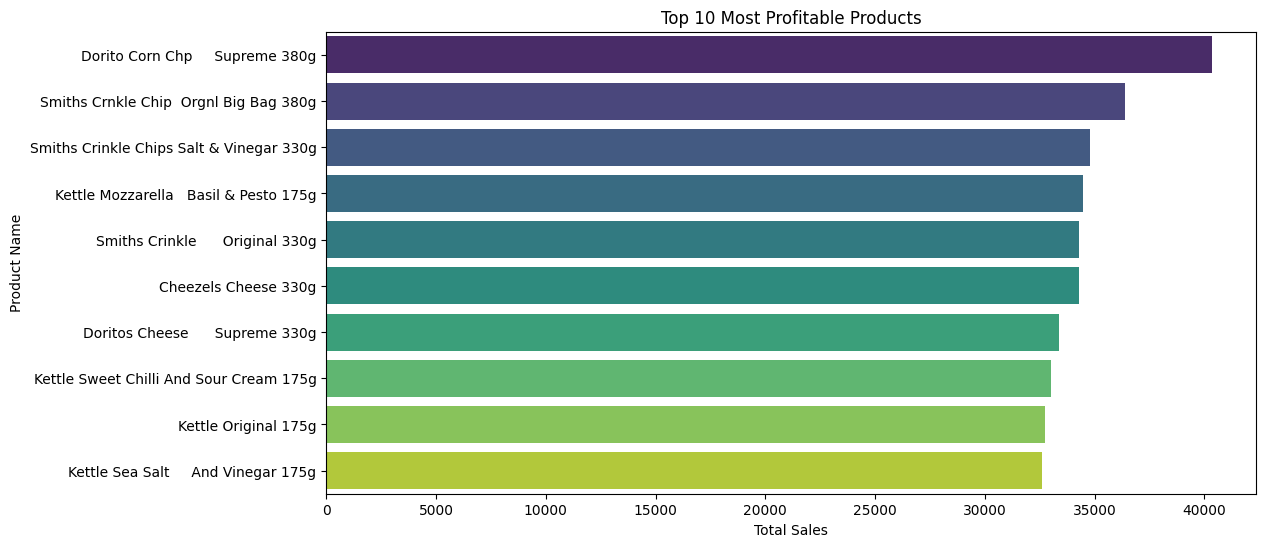

In [10]:
# Top 10 Most Sold Products
top_products = df.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(10).reset_index()

# Plot Top Products
plt.figure(figsize=(12, 6))
sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products, palette="viridis")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()



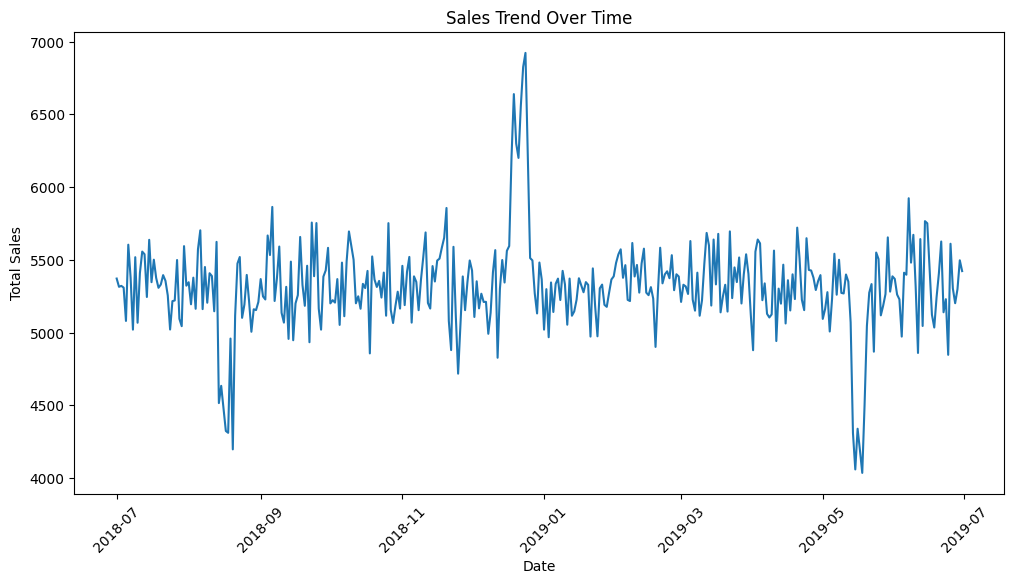

In [11]:
# Convert DATE to a readable format (if necessary)
df["DATE"] = pd.to_datetime(df["DATE"], origin="1899-12-30", unit="D")  # Adjust if needed

# Aggregate Sales by Date
sales_trend = df.groupby("DATE")["TOT_SALES"].sum().reset_index()

# Plot Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="DATE", y="TOT_SALES", data=sales_trend)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

## Purchase Frequency Analysis (Loyalty)

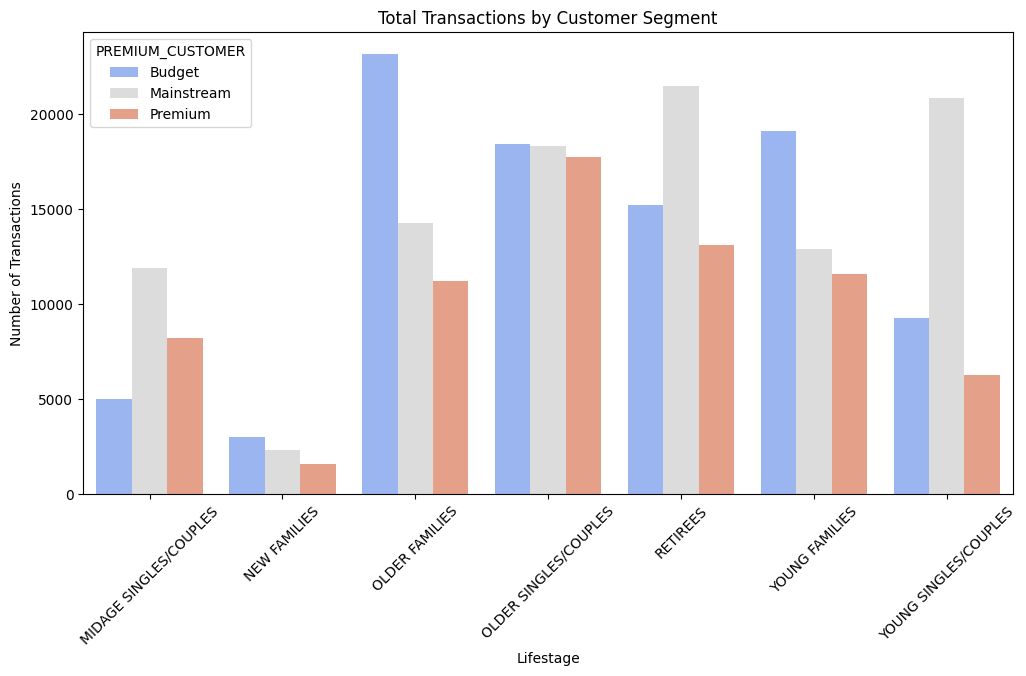

In [12]:
# Count transactions per customer segment
loyalty_analysis = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TXN_ID"].count().reset_index()
loyalty_analysis = loyalty_analysis.rename(columns={"TXN_ID": "Total_Transactions"})

# Sort and visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x="LIFESTAGE", y="Total_Transactions", hue="PREMIUM_CUSTOMER", data=loyalty_analysis, palette="coolwarm")
plt.title("Total Transactions by Customer Segment")
plt.xlabel("Lifestage")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

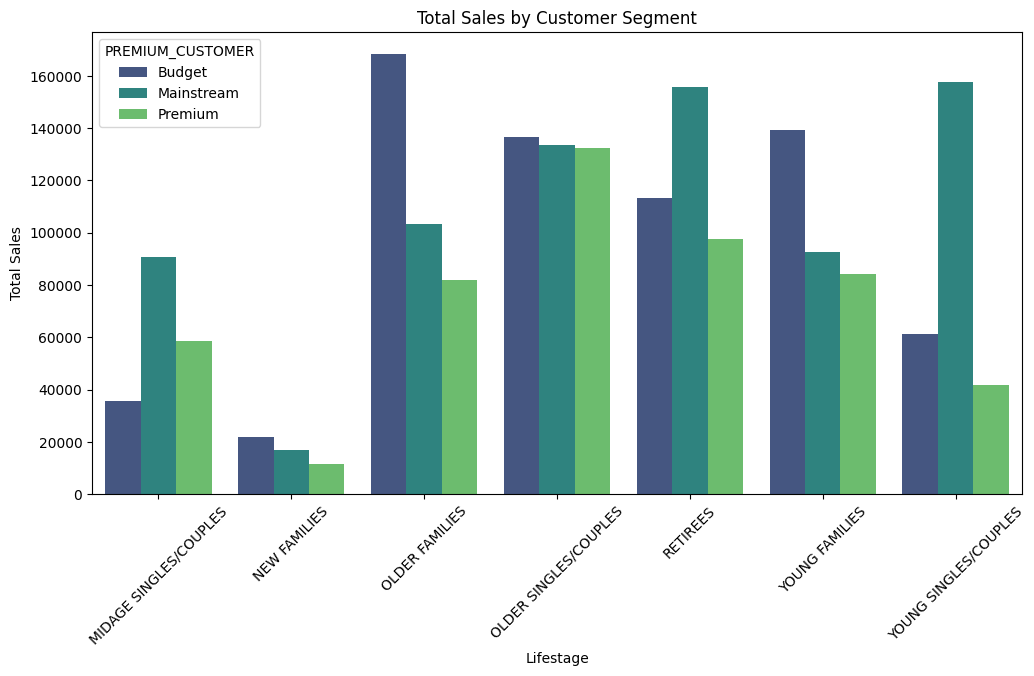

In [13]:
# Total sales per segment
spending_analysis = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=spending_analysis, palette="viridis")
plt.title("Total Sales by Customer Segment")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

C:\Users\shaz9\AppData\Local\Temp\ipykernel_17620\3912239765.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products_old_premium, palette="magma")


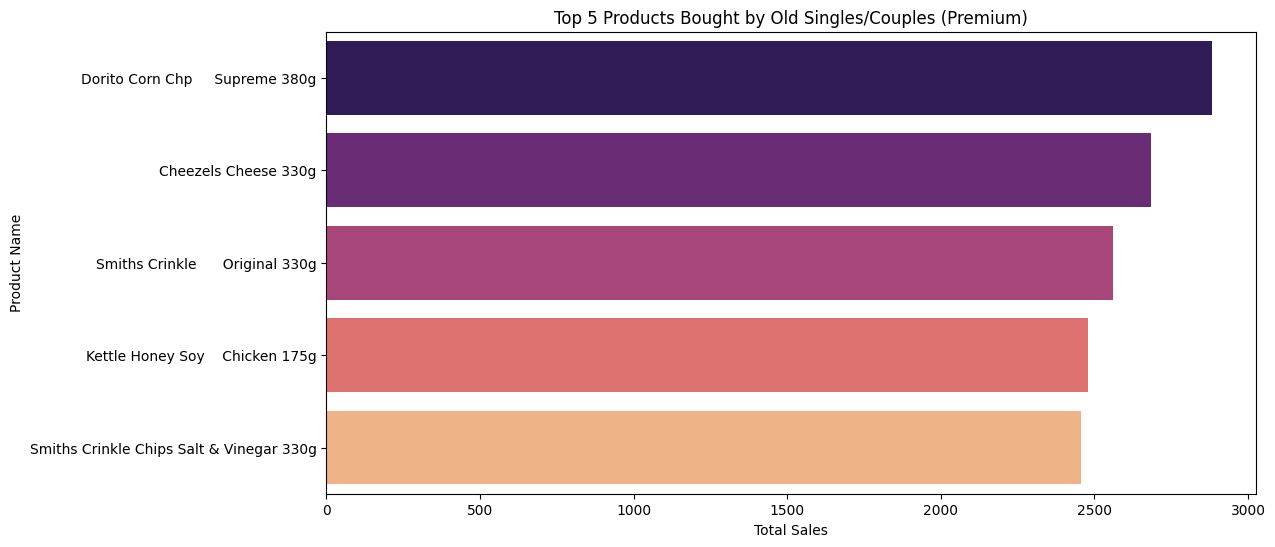

In [ ]:
# Filter for Old Singles/Couples (Premium)
old_premium = df[(df["LIFESTAGE"] == "OLDER SINGLES/COUPLES") & (df["PREMIUM_CUSTOMER"] == "Premium")]

# Top 5 products purchased by this segment
top_products_old_premium = old_premium.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(5).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products_old_premium, palette="magma")
plt.title("Top 5 Products Bought by Old Singles/Couples (Premium)")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

In [15]:
# Derive a Marital_Status column using LIFESTAGE
df["Marital_Status"] = df["LIFESTAGE"].apply(
    lambda x: "Married" if "FAMILIES" in x.upper() else "Unmarried"
)

In [16]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Marital_Status
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Unmarried
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,Unmarried
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,Married
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,Married
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,Unmarried


In [ ]:
marital_sales = df.groupby("Marital_Status")["TOT_SALES"].sum().reset_index()

print(marital_sales)

  Marital_Status   TOT_SALES
0        Married   720360.75
1      Unmarried  1214054.25


In [ ]:
transaction_counts = df.groupby("Marital_Status")["TXN_ID"].nunique().reset_index()
transaction_counts = transaction_counts.rename(columns={"TXN_ID": "Transaction_Count"})

print(transaction_counts)

  Marital_Status  Transaction_Count
0        Married              98264
1      Unmarried             164863


In [43]:
df['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

## Hypothesis Testing

The hypothesis which I assumed is that There is no significant difference in total sales because of the marital status of the customer. The threshold value I have taken is alpha=0.05.

In [53]:
import scipy.stats as stats

married_sales = df[df["Marital_Status"] == "Married"]["TOT_SALES"]
unmarried_sales = df[df["Marital_Status"] == "Unmarried"]["TOT_SALES"]

t_stat, p_value = stats.ttest_ind(married_sales, unmarried_sales, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in total sales between Married and Unmarried customers.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in total sales between Married and Unmarried customers.")


T-statistic: -4.181634298640665
P-value: 2.8958255344826314e-05
Reject the null hypothesis (H₀): There is a significant difference in total sales between Married and Unmarried customers.


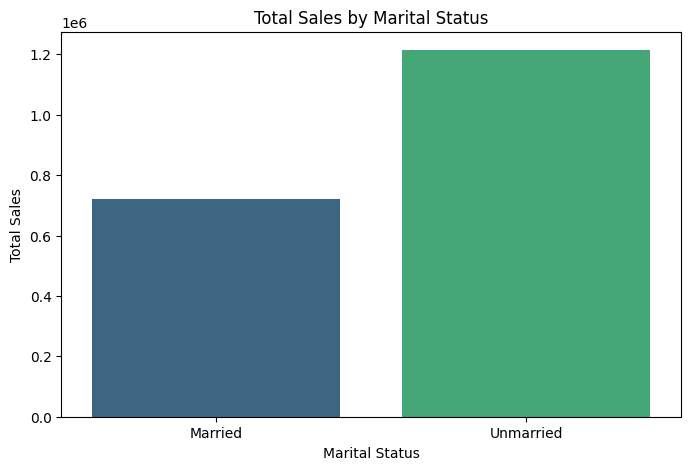

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Marital_Status", y="TOT_SALES", data=marital_sales, hue="Marital_Status", palette="viridis", legend=False)
plt.title("Total Sales by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Sales")
plt.show()


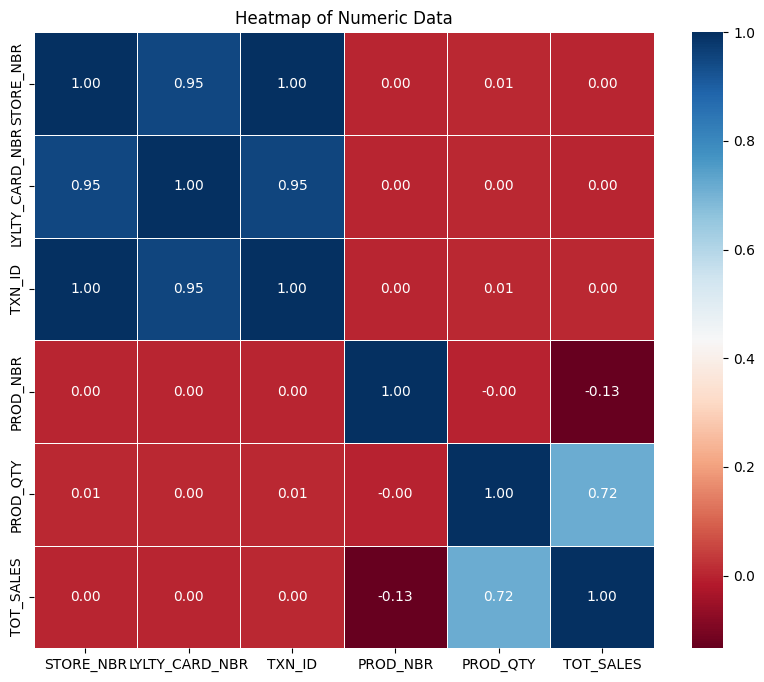

In [52]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', linewidths=0.5, fmt=".2f")

plt.title('Heatmap of Numeric Data')
plt.show()

In [34]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Marital_Status
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Unmarried
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,Unmarried
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,Married
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,Married
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,YOUNG FAMILIES,Mainstream,Married
264832,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Premium,Married
264833,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,OLDER FAMILIES,Budget,Married
264834,2018-10-27,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,OLDER FAMILIES,Budget,Married
